# Чистка датасета

In [ ]:
import pandas as pd
data = pd.read_csv('gdp_prediction.csv')

In [ ]:
data.columns = (
    data.columns
    .str.replace(r"\[.*?\]", "", regex=True)
    .str.replace(r", value added \(.*?\)", "", regex=True)
    .str.strip()
    .str.replace(r"\s{2,}", " ", regex=True)
    .str.rstrip(",")
)

In [ ]:
data.columns

Index(['Country Name', '1993 - Agriculture, forestry, and fishing',
       '1993 - Industry (including construction)', '1993 - Services',
       '1993 - GDP (current LCU)',
       '1993 - GDP deflator (base year varies by country)',
       '1994 - Agriculture, forestry, and fishing',
       '1994 - Industry (including construction)', '1994 - Services',
       '1994 - GDP (current LCU)',
       ...
       '2022 - Agriculture, forestry, and fishing',
       '2022 - Industry (including construction)', '2022 - Services',
       '2022 - GDP (current LCU)',
       '2022 - GDP deflator (base year varies by country)',
       '2023 - Agriculture, forestry, and fishing',
       '2023 - Industry (including construction)', '2023 - Services',
       '2023 - GDP (current LCU)',
       '2023 - GDP deflator (base year varies by country)'],
      dtype='object', length=156)

In [ ]:
numeric_columns = [col for col in data.columns if "GDP" in col or "Agriculture" in col or "Industry" in col or "Services" in col]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
data

,Country Name,"1993 - Agriculture, forestry, and fishing",1993 - Industry (including construction),1993 - Services,1993 - GDP (current LCU),1993 - GDP deflator (base year varies by country),"1994 - Agriculture, forestry, and fishing",1994 - Industry (including construction),1994 - Services,1994 - GDP (current LCU),...,"2022 - Agriculture, forestry, and fishing",2022 - Industry (including construction),2022 - Services,2022 - GDP (current LCU),2022 - GDP deflator (base year varies by country),"2023 - Agriculture, forestry, and fishing",2023 - Industry (including construction),2023 - Services,2023 - GDP (current LCU),2023 - GDP deflator (base year varies by country)
0,Kazakhstan,16.438445,36.989644,47.035493,2.942310e+10,0.575879,14.947547,38.698719,44.374131,4.234690e+11,...,5.247145,34.979397,52.643919,1.037660e+14,668.750441,4.284763,32.048348,55.968227,1.192510e+14,731.258520
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.701432,16.050368,45.049909,1.283440e+12,124.278695,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,1.209760e+11,26.310967,NaN,NaN,NaN,1.779820e+11,...,18.622821,21.394406,47.350964,2.138340e+12,125.521716,18.266984,21.156164,48.000111,2.312590e+12,131.236824
3,Algeria,NaN,NaN,NaN,1.166000e+12,11.339010,NaN,NaN,NaN,1.491500e+12,...,10.616864,43.060793,42.754956,3.202840e+13,135.777887,13.153359,37.998559,45.057657,3.258870e+13,132.711677
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.710000e+08,135.038760,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,13.262758,33.148103,52.885731,2.843300e+09,...,5.745219,17.392711,58.330855,1.916550e+10,122.580748,NaN,NaN,NaN,1.739630e+10,117.751816
214,"Yemen, Rep.",25.662154,28.878804,41.459043,2.610590e+11,147.499351,27.574133,27.779626,40.646241,3.365140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,30.478730,37.442894,21.454832,1.482122e+09,3.510865,11.826503,37.324946,38.047889,2.447760e+09,...,3.093948,35.283821,55.534568,4.939640e+11,320.700964,2.791978,36.068181,54.937111,5.692240e+11,349.195510


In [ ]:
processed_data = []

for year in range(1993, 2024):
    gdp_col = f"{year} - GDP (current LCU)"
    deflator = f"{year} - GDP deflator (base year varies by country)"
    agri_col = f"{year} - Agriculture, forestry, and fishing"
    ind_col = f"{year} - Industry (including construction)"
    srv_col = f"{year} - Services"

    if all(col in data.columns for col in [gdp_col, agri_col, ind_col, srv_col]):
        year_data = data[["Country Name"]].copy()
        year_data["Year"] = year
        year_data["GDP current (billions)"] = data[gdp_col] / (1e9)
        year_data["GDP real (billions)"] = data[gdp_col] / data[deflator] * 100 / (1e9)
        year_data["Agriculture"] = data[agri_col] / 100 * year_data['GDP real (billions)']
        year_data["Industry"] = data[ind_col] / 100 * year_data['GDP real (billions)']
        year_data["Services"] = data[srv_col] / 100 * year_data['GDP real (billions)']
        processed_data.append(year_data)

features = pd.concat(processed_data, ignore_index=True)
features = features.sort_values(by=["Country Name", "Year"])

In [ ]:
features[features['Country Name'] == 'Japan']

,Country Name,Year,GDP current (billions),GDP real (billions),Agriculture,Industry,Services
99,Japan,1993,504498.0,441696.630882,NaN,NaN,NaN
316,Japan,1994,510916.0,446481.633390,8447.928335,154276.696302,280978.667951
533,Japan,1995,521614.0,458229.092380,7538.007303,157247.925800,289659.704565
750,Japan,1996,535562.0,472588.859601,7814.416226,162031.620846,298571.463019
967,Japan,1997,543545.0,477225.775349,7291.593936,161916.512044,306247.559835
1184,Japan,1998,536497.0,471163.426018,7554.108046,157260.184050,305804.285446
1401,Japan,1999,528070.0,469590.509499,7401.029551,154365.270647,309050.496413
1618,Japan,2000,535418.0,482573.211036,7324.883892,156901.861098,318597.929392
1835,Japan,2001,531654.0,484436.262482,6624.695886,150084.296697,324893.386419
2052,Japan,2002,524479.0,484639.729921,6671.020321,146470.727403,331168.192029


In [ ]:
numeric_columns = ['GDP real (billions)', 'Agriculture', 'Industry', 'Services']

for col in numeric_columns:
    features[f'{col}_pct_change'] = features.groupby('Country Name')[col].pct_change() * 100


<ipython-input-251-e70614d4f83b>:4: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

<ipython-input-251-e70614d4f83b>:4: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

<ipython-input-251-e70614d4f83b>:4: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

<ipython-input-251-e70614d4f83b>:4: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and 

In [ ]:
features[features['Country Name'] == 'Kazakhstan']

,Country Name,Year,GDP current (billions),GDP real (billions),Agriculture,Industry,Services,GDP real (billions)_pct_change,Agriculture_pct_change,Industry_pct_change,Services_pct_change
0,Kazakhstan,1993,29.4231,5109.251357,839.881490,1889.893898,2403.161540,NaN,NaN,NaN,NaN
217,Kazakhstan,1994,423.4690,4465.487799,667.480909,1728.086565,1981.521405,-12.599959,-20.526775,-8.561715,-17.545226
434,Kazakhstan,1995,1014.1900,4099.315864,505.420477,1229.700177,2212.065924,-8.200043,-24.279411,-28.840360,11.634723
651,Kazakhstan,1996,1415.7500,4119.813316,500.646106,1054.168131,2391.236475,0.500021,-0.944633,-14.274378,8.099693
868,Kazakhstan,1997,1672.1400,4189.842990,477.926132,1072.867211,2466.549820,1.699826,-4.538131,1.773823,3.149557
1085,Kazakhstan,1998,1733.2600,4110.233818,352.074207,1204.899879,2332.008393,-1.900051,-26.332924,12.306525,-5.454641
1302,Kazakhstan,1999,2016.4600,4221.226401,417.325159,1391.597580,2213.709339,2.700396,18.533295,15.494873,-5.072840
1519,Kazakhstan,2000,2599.9000,4634.895231,375.926335,1750.870128,2242.433632,9.799731,-9.920040,25.817273,1.297564
1736,Kazakhstan,2001,3250.5900,5260.603984,458.978853,1901.278541,2597.250309,13.499955,22.092764,8.590495,15.822840
1953,Kazakhstan,2002,3776.2800,5776.153168,461.855956,2068.494290,2915.290960,9.800190,0.626849,8.794911,12.245283


In [ ]:
features = features[features['Year'] > 1993]

In [ ]:
features.to_csv('gdp_prediction_processed.csv')

In [ ]:
features = features.dropna()

# Анализ данных

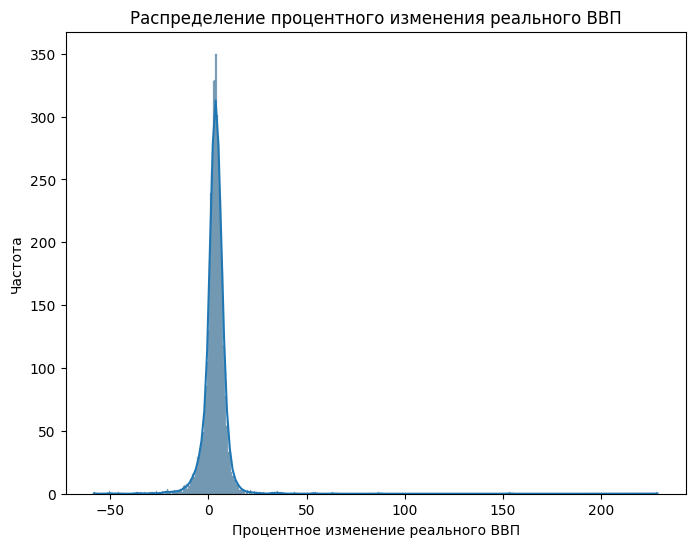

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(features['GDP real (billions)_pct_change'], kde=True)
plt.title('Распределение процентного изменения реального ВВП')
plt.xlabel('Процентное изменение реального ВВП')
plt.ylabel('Частота')
plt.show()


In [ ]:
mean = features['GDP real (billions)_pct_change'].mean()
std = features['GDP real (billions)_pct_change'].std()
print(f'Mean: {mean}')
print(f'STD: {std}')


Mean: 3.44137978403117
STD: 6.564206849395891


In [ ]:
features_sub = features[np.abs(features['GDP real (billions)_pct_change'] - mean) < 4*std].copy()

In [ ]:
features_sub

,Country Name,Year,GDP current (billions),GDP real (billions),Agriculture,Industry,Services,GDP real (billions)_pct_change,Agriculture_pct_change,Industry_pct_change,Services_pct_change
2171,Afghanistan,2003,221.359,530.147423,198.375098,120.401061,198.512663,8.832326,5.425921,3.807770,12.726831
2388,Afghanistan,2004,249.792,537.643399,159.793356,141.006604,221.030015,1.413942,-19.448884,17.114087,11.343031
2605,Afghanistan,2005,308.163,598.018640,186.072632,160.341351,233.273838,11.229607,16.445788,13.711944,5.539439
2822,Afghanistan,2006,348.048,630.056639,180.422821,177.743817,250.958013,5.357358,-3.036347,10.853386,7.580865
3039,Afghanistan,2007,485.419,717.171034,215.904421,192.791650,288.981811,13.826439,19.665805,8.466023,15.151458
...,...,...,...,...,...,...,...,...,...,...,...
5858,Zimbabwe,2019,212.174,212.174000,20.833920,67.950732,111.767532,-6.332619,25.658884,-3.350846,-11.866302
6075,Zimbabwe,2020,1378.800,195.589487,17.158789,64.089818,103.452313,-7.816468,-17.640130,-5.681932,-7.439745
6292,Zimbabwe,2021,3189.940,212.151502,18.775194,61.111484,120.162335,8.467743,9.420273,-4.647125,16.152391
6509,Zimbabwe,2022,12388.400,225.987934,16.252876,91.399430,92.064016,6.521958,-13.434310,49.561791,-23.383633


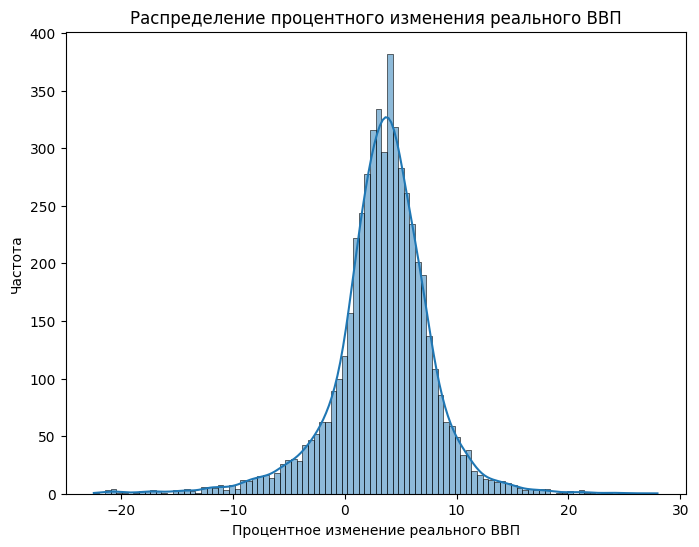

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(features_sub['GDP real (billions)_pct_change'], kde=True)
plt.title('Распределение процентного изменения реального ВВП')
plt.xlabel('Процентное изменение реального ВВП')
plt.ylabel('Частота')
plt.show()


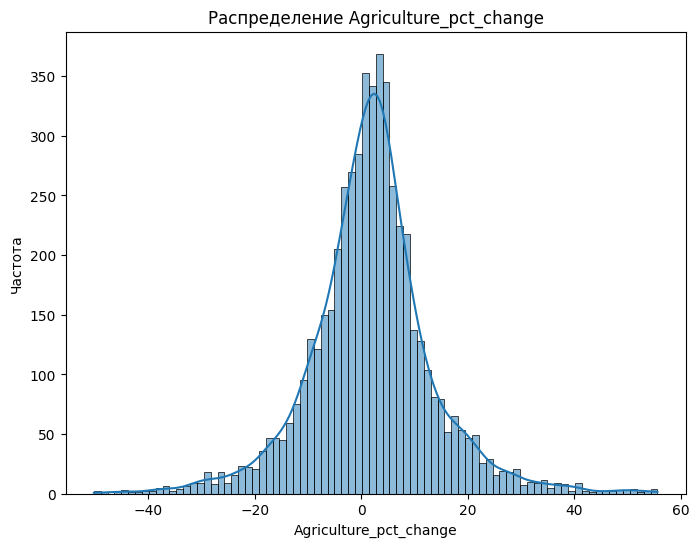

Mean: 2.1296960933361127
STD: 13.713945292684688


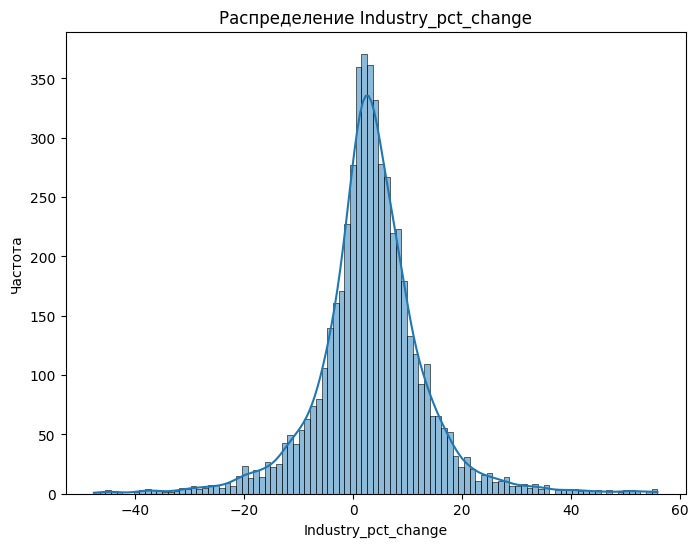

Mean: 3.7134455161209012
STD: 13.06418421311621


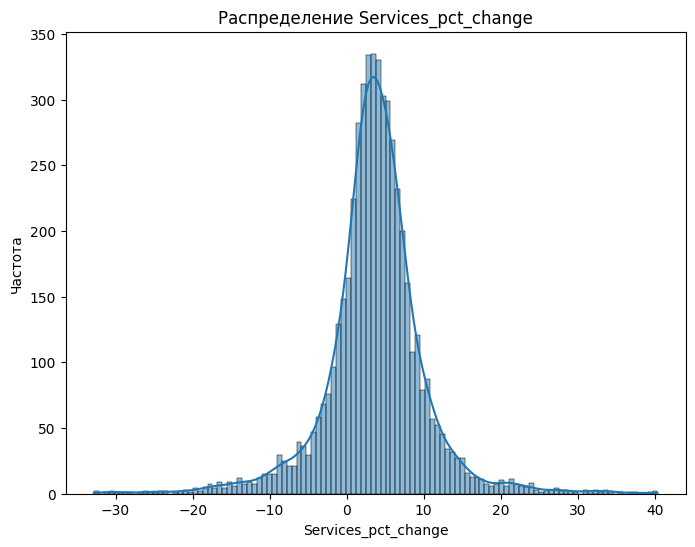

Mean: 4.0118508342777295
STD: 9.298193699238658


In [ ]:
variables = ['Agriculture_pct_change', 'Industry_pct_change', 'Services_pct_change']
for var in variables:
    plt.figure(figsize=(8, 6))
    mean = features[var].mean()
    std = features[var].std()
    sns.histplot(features[np.abs(features[var] - mean) < 4*std][var], kde=True)
    plt.title(f'Распределение {var}')
    plt.xlabel(f'{var}')
    plt.ylabel('Частота')
    plt.show()
    print(f'Mean: {mean}')
    print(f'STD: {std}')


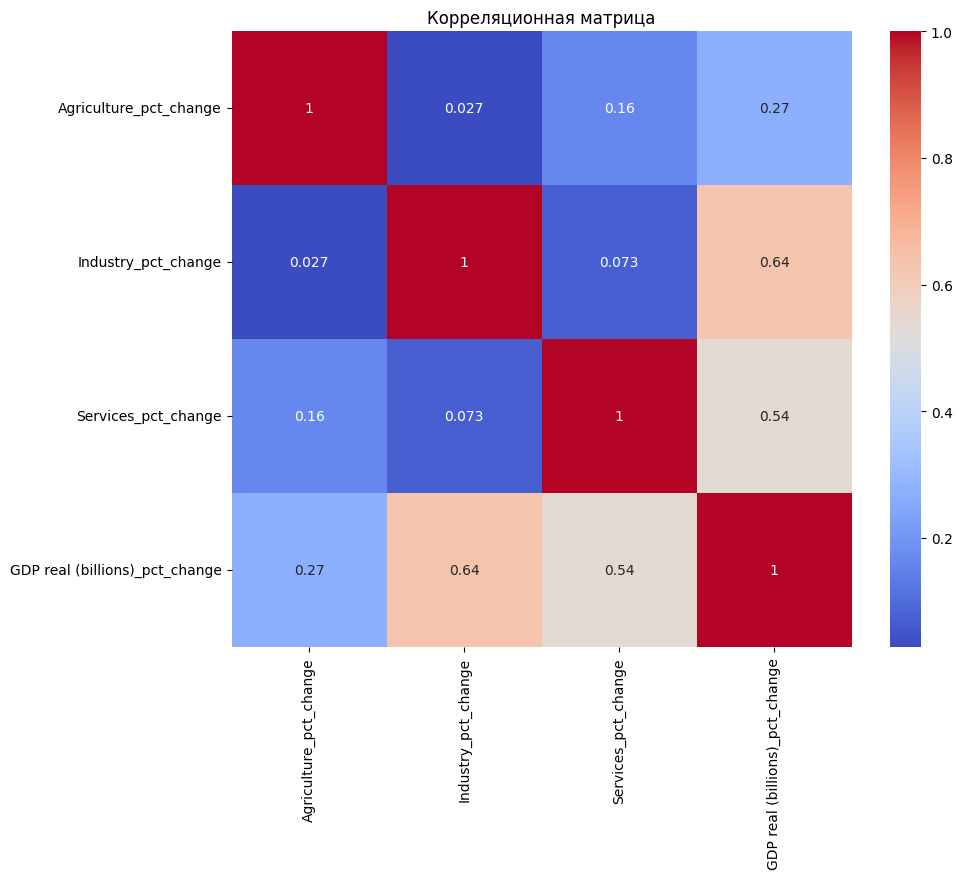

In [ ]:
corr_matrix = features[variables + ['GDP real (billions)_pct_change']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = features[variables]

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                  Feature       VIF
0                   const  1.257279
1  Agriculture_pct_change  1.027175
2     Industry_pct_change  1.005592
3     Services_pct_change  1.031889


In [ ]:
import statsmodels.api as sm

y = features['GDP real (billions)_pct_change']

X = features[variables]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     GDP real (billions)_pct_change   R-squared:                       0.679
Model:                                        OLS   Adj. R-squared:                  0.679
Method:                             Least Squares   F-statistic:                     3744.
Date:                            Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                                    01:09:43   Log-Likelihood:                -14535.
No. Observations:                            5319   AIC:                         2.908e+04
Df Residuals:                                5315   BIC:                         2.910e+04
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
features[features['Country Name'] == 'Germany']

,Country Name,Year,GDP current (billions),GDP real (billions),Agriculture,Industry,Services,GDP real (billions)_pct_change,Agriculture_pct_change,Industry_pct_change,Services_pct_change
291,Germany,1994,1829.55,2292.936590,22.368524,692.397794,1355.198152,2.391892,3.879724,1.021927,2.308099
508,Germany,1995,1894.61,2328.342890,23.177618,693.102949,1393.203425,1.544146,3.617112,0.101842,2.804407
725,Germany,1996,1921.38,2347.105210,24.460770,677.278954,1425.822011,0.805823,5.536169,-2.283066,2.341265
942,Germany,1997,1961.15,2389.169110,24.641523,682.779858,1459.932597,1.792161,0.738951,0.812207,2.392345
1159,Germany,1998,2014.42,2437.285370,23.771282,691.811211,1493.560518,2.013933,-3.531606,1.322733,2.303389
1376,Germany,1999,2059.48,2483.283310,23.799719,686.737296,1528.140212,1.887261,0.119629,-0.733425,2.315252
1593,Germany,2000,2109.09,2555.609010,25.422923,708.220037,1570.801239,2.912503,6.820264,3.128233,2.791696
1810,Germany,2001,2172.54,2598.580770,28.153863,703.414789,1615.873628,1.681468,10.742039,-0.678496,2.869388
2027,Germany,2002,2198.12,2593.436260,23.353810,684.115384,1637.026115,-0.197974,-17.049358,-2.743674,1.309043
2244,Germany,2003,2211.57,2575.279180,21.433004,674.382728,1629.051530,-0.700117,-8.224809,-1.422663,-0.487139


# Начало моделей

In [ ]:
feature_cols = ['Agriculture_pct_change',	'Industry_pct_change',	'Services_pct_change']

target_col = 'GDP real (billions)_pct_change'

X = features[feature_cols]
y = features[target_col]


In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Лучшая модель - модель эластичной сети

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNetCV
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

elastic_net_cv = ElasticNetCV(
    l1_ratio=np.linspace(0.1, 1, 10),
    alphas=np.linspace(0.1, 1, 10),
    cv=kf,
    max_iter=10000,
    n_jobs=-1
)

elastic_net_cv.fit(X_train, y_train)

y_test_pred_en = elastic_net_cv.predict(X_test)
y_train_pred_en = elastic_net_cv.predict(X_train)
mse_en_test = mean_squared_error(y_test, y_test_pred_en)
mse_en_train = mean_squared_error(y_train, y_train_pred_en)
print("Elastic Net Train MSE:", mse_en_train)
print("Elastic Net Test MSE:", mse_en_test)
r2_en_test = r2_score(y_test, y_test_pred_en)
r2_en_train = r2_score(y_train, y_train_pred_en)
print("Elastic Net Train R2:", r2_en_train)
print("Elastic Net Test R2:", r2_en_test)



Elastic Net Train MSE: 14.178358504732271
Elastic Net Test MSE: 12.528007682912644
Elastic Net Train R2: 0.6807813615378376
Elastic Net Test R2: 0.6678887015589321


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_en_test = mean_absolute_error(y_test, y_test_pred_en)
mae_en_train = mean_absolute_error(y_train, y_train_pred_en)
print("Elastic Net Train MAE:", mae_en_train)
print("Elastic Net Test MAE:", mae_en_test)

Elastic Net Train MAE: 1.9229139252093077
Elastic Net Test MAE: 1.8640939294593883


In [ ]:
print("Elastic Net Coefficients:")
print(elastic_net_cv.coef_)

Elastic Net Coefficients:
[1.20749382 3.88230337 3.00044741]


# Коэффиценты для визуализации данных

In [ ]:
coefficients = elastic_net_cv.coef_

normalized_coefficients = (coefficients / np.sum(np.abs(coefficients))) * 100

print("Normalized Elastic Net Coefficients (Sum to 100%):")
print(normalized_coefficients)

Normalized Elastic Net Coefficients (Sum to 100%):
[14.92530671 47.98746591 37.08722738]


# Прогнозирование
#### Мы используем натреннированную модель чтобы предугадать изменение в ВВП основываясь на изменения в секторах (Сель-Хоз, Промышленность, Сфера Услуг)
#### Путем построения графиков мы визуализируем то как инвестиции по секторам могут увеличить ВВП Казахстана
#### Рост ВВП за 10 лет с ростом сектора в 10.5 процента - означает что не увеличивая инвестиции в двух их трех секторов, только увеличивая инвестиции в одном их секторов, мы прогнозируем увеличение в ВВП. Таким образом мы находим самую выдающуюся отрасль.
#### Несмотря на то, что сектор промышленности развивает экономику быстрее, он полагается на нестабильные рыночные цены сырья - следовательно, не самый лучший вариант для развития Казахстана.
#### Вклад сектора Услуг в рост ВВП же вполне сопоставим со вкладом Промышленности, при этом не полагаясь на нестабильность сырья.
#### Рассматривая различные проценты инвестиций в отрасли мы находим самый эффективный подход к инвестициям. В нашем случае если каждый год увеличивать сектор Услуг на 1.2 процента либо на 2 процента можно удвоить ВВП в 2 раза за 10 и 8 лет соответственно. Но так как разница в скорости всего лишь 2 года а разница в расширении сектора составляет целые 0.8 процентов, лучшим решением будет увеличивать сектор Услуг по 1.2 процента каждый год.


Год 1 - Инкремент 60.0%:
Годовой процент увеличения сельского хозяйства: 4.1969
Годовой процент увеличения индустрии: 5.8018
Годовой процент увеличения услуг: 5.2726
Базовый случай: 3.4724
Год 1 - Инкремент 60.0%:
gdp agri: 1.0420
gdp ind: 1.0580
gdp srv: 1.0527
gdp base: 1.0347
Год 2 - Инкремент 60.0%:
Годовой процент увеличения сельского хозяйства: 4.1969
Годовой процент увеличения индустрии: 5.8018
Годовой процент увеличения услуг: 5.2726
Базовый случай: 3.4724
Год 2 - Инкремент 60.0%:
gdp agri: 1.0857
gdp ind: 1.1194
gdp srv: 1.1082
gdp base: 1.0707
Год 3 - Инкремент 60.0%:
Годовой процент увеличения сельского хозяйства: 4.1969
Годовой процент увеличения индустрии: 5.8018
Годовой процент увеличения услуг: 5.2726
Базовый случай: 3.4724
Год 3 - Инкремент 60.0%:
gdp agri: 1.1313
gdp ind: 1.1843
gdp srv: 1.1667
gdp base: 1.1078
Год 4 - Инкремент 60.0%:
Годовой процент увеличения сельского хозяйства: 4.1969
Годовой процент увеличения индустрии: 5.8018
Годовой процент увеличения услуг: 5

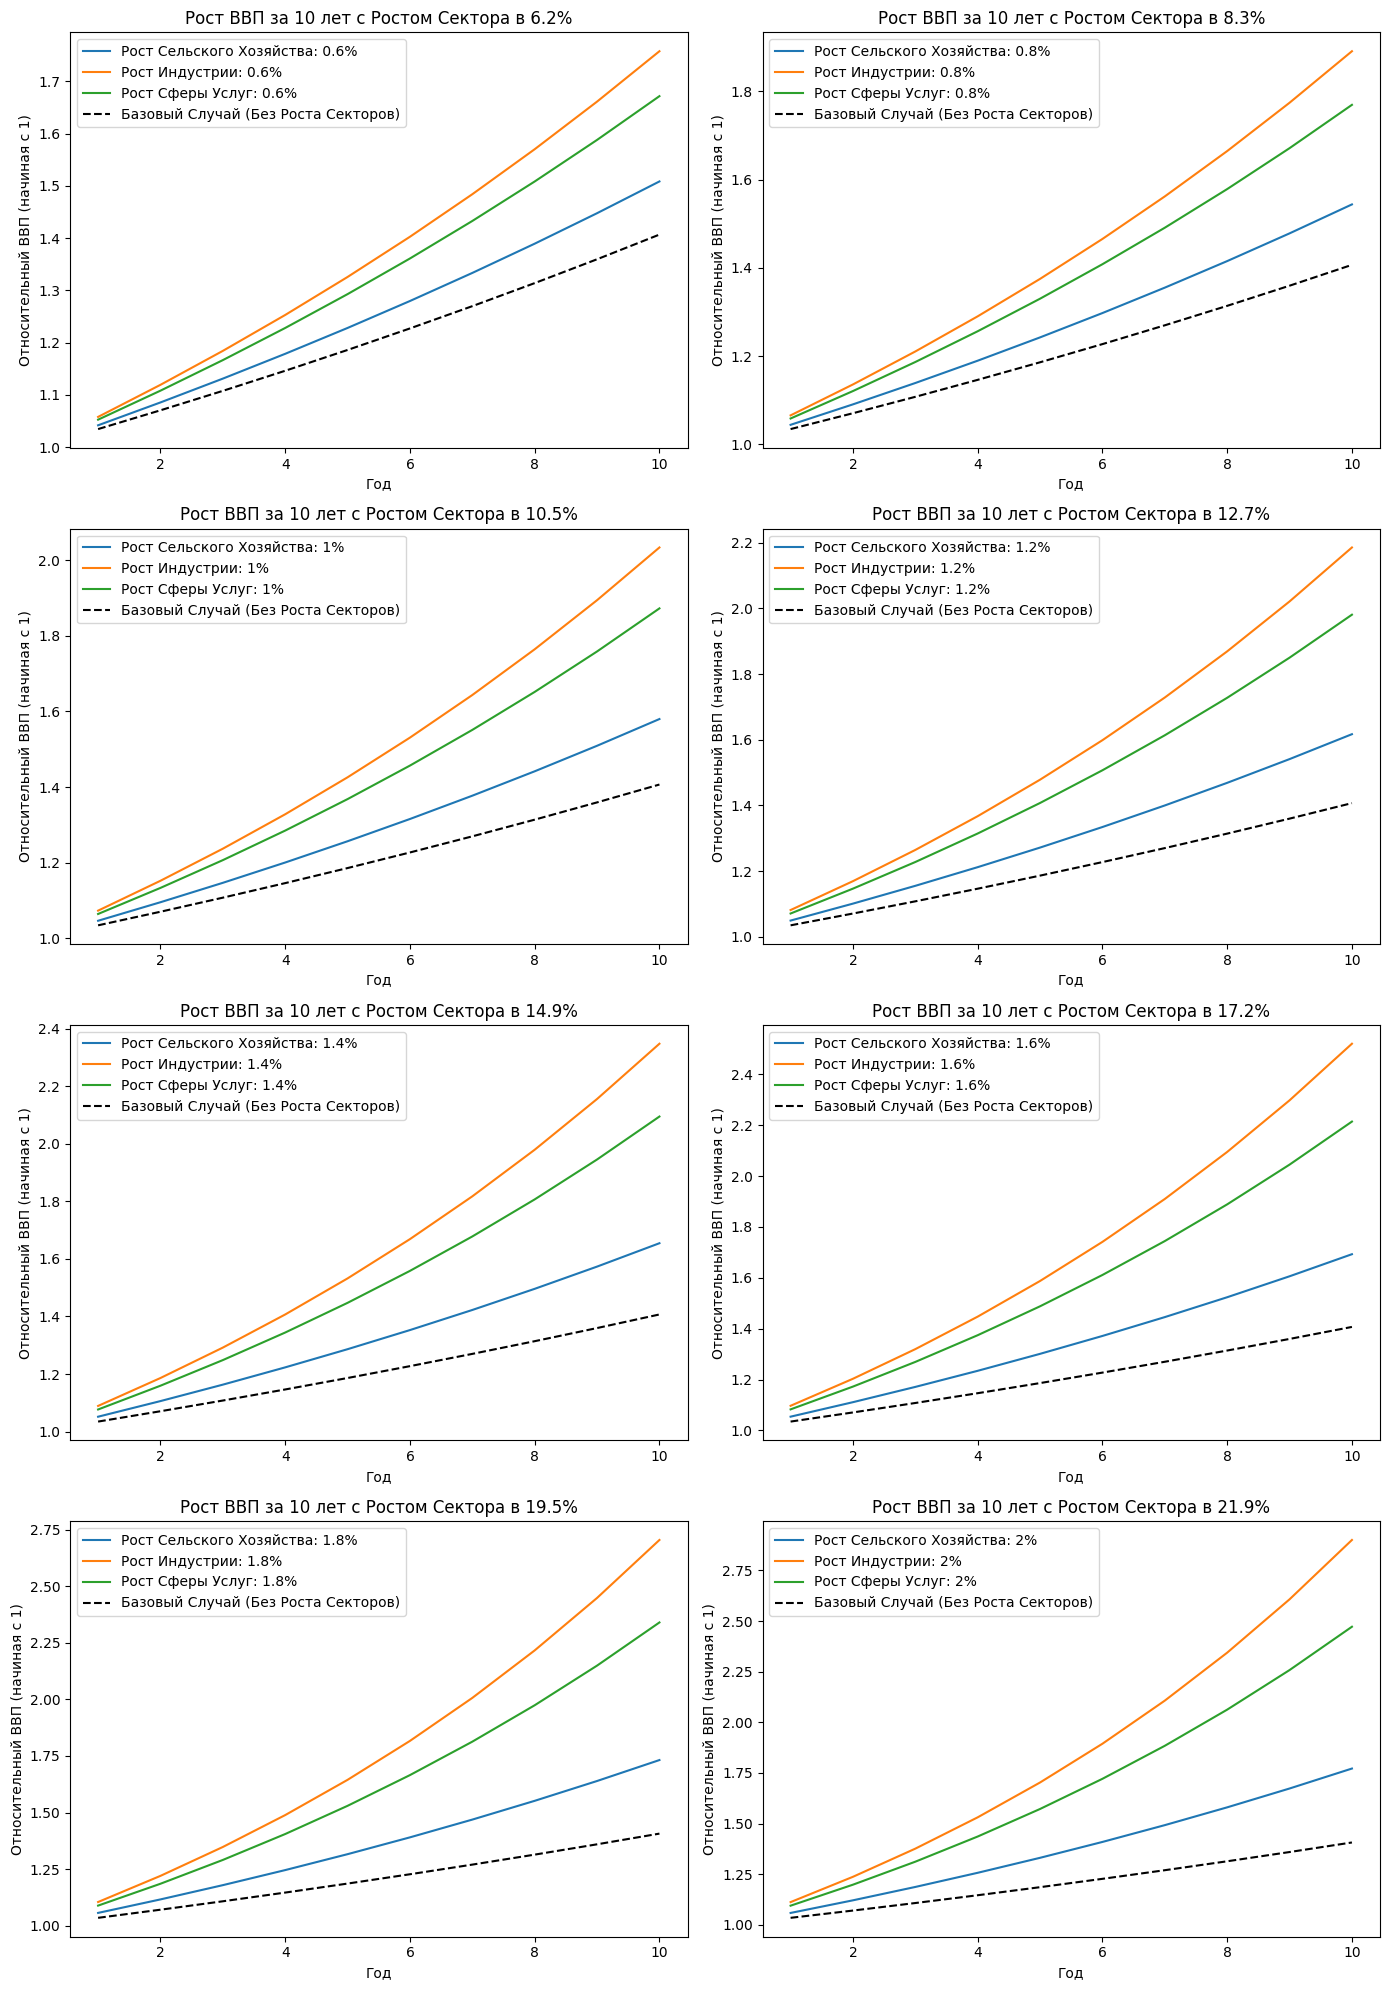

In [ ]:
growth_increments = [0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

avg_agri_growth = 0
avg_industry_growth = 0
avg_services_growth = 0

baseline_gdp = 1

def predict_gdp_change_with_model(agri_growth, ind_growth, srv_growth):
    input_features = np.array([[agri_growth, ind_growth, srv_growth]])

    predicted_gdp_change_percentage = elastic_net_cv.predict(input_features)[0]
    return predicted_gdp_change_percentage

fig, axes = plt.subplots(4, 2, figsize=(14, 20))  # 4 rows, 2 columns
axes = axes.flatten()

for i, increment in enumerate(growth_increments):
    ax = axes[i]

    agri_gdp_values = []
    ind_gdp_values = []
    srv_gdp_values = []
    base_gdp_values = []

    gdp_agri = baseline_gdp
    gdp_ind = baseline_gdp
    gdp_srv = baseline_gdp
    gdp_base = baseline_gdp

    for year in range(1, 11):
        agri_gdp_change_percentage = predict_gdp_change_with_model(avg_agri_growth + increment, avg_industry_growth, avg_services_growth)
        ind_gdp_change_percentage = predict_gdp_change_with_model(avg_agri_growth, avg_industry_growth + increment, avg_services_growth)
        srv_gdp_change_percentage = predict_gdp_change_with_model(avg_agri_growth, avg_industry_growth, avg_services_growth + increment)
        base = predict_gdp_change_with_model(avg_agri_growth, avg_industry_growth, avg_services_growth)

        print(f"Год {year} - Инкремент {increment*100:.1f}%:")
        print(f"Годовой процент увеличения сельского хозяйства: {agri_gdp_change_percentage:.4f}")
        print(f"Годовой процент увеличения индустрии: {ind_gdp_change_percentage:.4f}")
        print(f"Годовой процент увеличения услуг: {srv_gdp_change_percentage:.4f}")
        print(f"Базовый случай: {base:.4f}")

        gdp_agri *= (1 + agri_gdp_change_percentage / 100)
        gdp_ind *= (1 + ind_gdp_change_percentage / 100)
        gdp_srv *= (1 + srv_gdp_change_percentage / 100)
        gdp_base *= (1 + base / 100)

        print(f"Год {year} - Инкремент {increment*100:.1f}%:")
        print(f"gdp agri: {gdp_agri:.4f}")
        print(f"gdp ind: {gdp_ind:.4f}")
        print(f"gdp srv: {gdp_srv:.4f}")
        print(f"gdp base: {gdp_base:.4f}")

        agri_gdp_values.append(gdp_agri)
        ind_gdp_values.append(gdp_ind)
        srv_gdp_values.append(gdp_srv)
        base_gdp_values.append(gdp_base)

    ax.plot(range(1, 11), agri_gdp_values, label=f"Рост Сельского Хозяйства: {avg_agri_growth + increment}%")
    ax.plot(range(1, 11), ind_gdp_values, label=f"Рост Индустрии: {avg_industry_growth + increment}%")
    ax.plot(range(1, 11), srv_gdp_values, label=f"Рост Сферы Услуг: {avg_services_growth + increment}%")
    ax.plot(range(1, 11), base_gdp_values, label="Базовый Случай (Без Роста Секторов)", linestyle='--', color='black')

    ax.set_title(f"Рост ВВП за 10 лет с Ростом Сектора в {(((1+increment/100)**10)-1)*100:.1f}%")
    ax.set_xlabel("Год")
    ax.set_ylabel("Относительный ВВП (начиная с 1)")
    ax.legend(loc="upper left")

plt.tight_layout()
plt.show()


# Сбор данных для визуализации

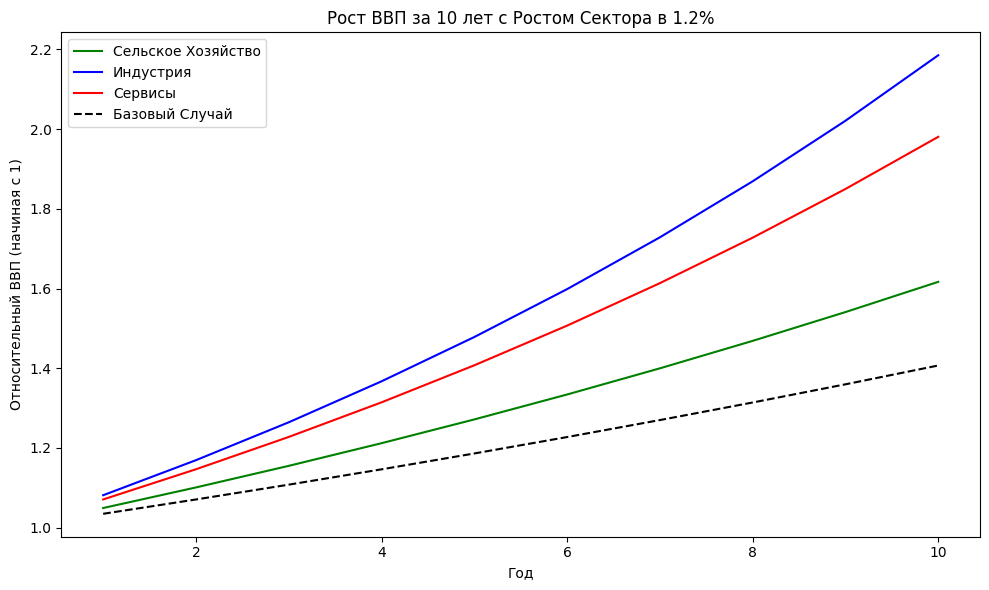

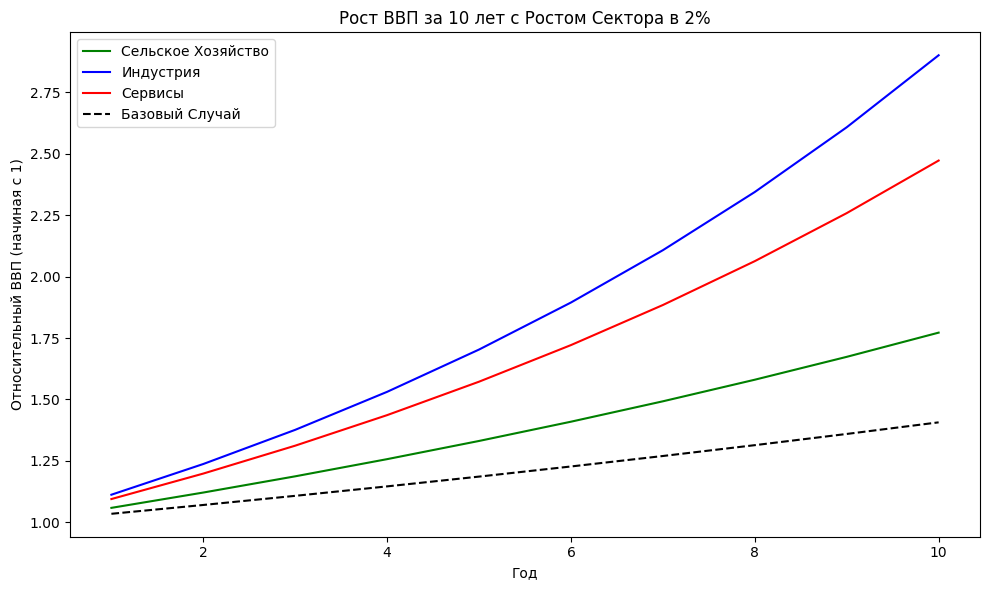

In [ ]:
growth_increments = [0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

avg_agri_growth = 0
avg_industry_growth = 0
avg_services_growth = 0

baseline_gdp = 1

def predict_gdp_change_with_model(agri_growth, ind_growth, srv_growth):
    input_features = np.array([[agri_growth, ind_growth, srv_growth]])

    predicted_gdp_change_percentage = elastic_net_cv.predict(input_features)[0]
    return predicted_gdp_change_percentage

stored_data = {}

for increment in [1.2, 2]:
    agri_gdp_values = []
    ind_gdp_values = []
    srv_gdp_values = []
    base_gdp_values = []

    gdp_agri = baseline_gdp
    gdp_ind = baseline_gdp
    gdp_srv = baseline_gdp
    gdp_base = baseline_gdp

    for year in range(1, 11):
        agri_gdp_change_percentage = predict_gdp_change_with_model(avg_agri_growth + increment, avg_industry_growth, avg_services_growth)
        ind_gdp_change_percentage = predict_gdp_change_with_model(avg_agri_growth, avg_industry_growth + increment, avg_services_growth)
        srv_gdp_change_percentage = predict_gdp_change_with_model(avg_agri_growth, avg_industry_growth, avg_services_growth + increment)
        base = predict_gdp_change_with_model(avg_agri_growth, avg_industry_growth, avg_services_growth)

        gdp_agri *= (1 + agri_gdp_change_percentage / 100)
        gdp_ind *= (1 + ind_gdp_change_percentage / 100)
        gdp_srv *= (1 + srv_gdp_change_percentage / 100)
        gdp_base *= (1 + base / 100)

        agri_gdp_values.append(gdp_agri)
        ind_gdp_values.append(gdp_ind)
        srv_gdp_values.append(gdp_srv)
        base_gdp_values.append(gdp_base)

    stored_data[increment] = {
        'agri': agri_gdp_values,
        'ind': ind_gdp_values,
        'srv': srv_gdp_values,
        'base': base_gdp_values
    }

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 11), stored_data[1.2]['agri'], label="Сельское Хозяйство", color='green')
ax.plot(range(1, 11), stored_data[1.2]['ind'], label="Индустрия", color='blue')
ax.plot(range(1, 11), stored_data[1.2]['srv'], label="Сервисы", color='red')
ax.plot(range(1, 11), stored_data[1.2]['base'], label="Базовый Случай", linestyle='--', color='black')

ax.set_title(f"Рост ВВП за 10 лет с Ростом Сектора в 1.2%")
ax.set_xlabel("Год")
ax.set_ylabel("Относительный ВВП (начиная с 1)")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 11), stored_data[2]['agri'], label="Сельское Хозяйство", color='green')
ax.plot(range(1, 11), stored_data[2]['ind'], label="Индустрия", color='blue')
ax.plot(range(1, 11), stored_data[2]['srv'], label="Сервисы", color='red')
ax.plot(range(1, 11), stored_data[2]['base'], label="Базовый Случай", linestyle='--', color='black')

ax.set_title(f"Рост ВВП за 10 лет с Ростом Сектора в 2%")
ax.set_xlabel("Год")
ax.set_ylabel("Относительный ВВП (начиная с 1)")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# Интерактивный Дэшборд

In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp

labels = ['Сель-Хоз', 'Промышленность', 'Услуги']
sizes = [14.92530671, 47.98746591, 37.08722738]
colors = ['#0f3c99', '#ffc404', '#ff5005']

pie_chart = go.Pie(
    labels=labels,
    values=sizes,
    hoverinfo='percent',
    textinfo='percent',
    textposition='inside',
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    showlegend=True,
)

elastic_net_metrics = {
    'Metric': ['Train MSE', 'Test MSE', 'Train R²', 'Test R²', 'Train MAE', 'Test MAE'],
    'Value': [14.178358504732271, 12.528007682912644, 0.6807813615378376, 0.6678887015589321, 1.9229139252093077, 1.8640939294593883]
}

mse_mae_rmse_data = {
    'Metric': ['Train MSE', 'Test MSE'],
    'Value': [14.178358504732271, 12.528007682912644]
}

mae_data = {
    'Metric': ['Train MAE', 'Test MAE'],
    'Value': [1.9229139252093077, 1.8640939294593883]
}

r2_data = {
    'Metric': ['Train R²', 'Test R²'],
    'Value': [0.6807813615378376, 0.6678887015589321]
}

fig = sp.make_subplots(
    rows=2, cols=3,
    column_widths=[0.6, 0.6, 0.4],
    row_heights=[0.5, 0.5],
    shared_xaxes=True,
    vertical_spacing=0.2,  # Increased vertical spacing between rows
    subplot_titles=('ВВП (Годовой рост сектора - 1.2%)', 'ВВП (Годовой рост сектора - 2%)', 'Вклад секторов в модель'),
    specs=[[{"type": "scatter"}, {"type": "scatter"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "bar"}, {"type": "bar"}]]
)

# Add first row traces (GDP growth for 1.2%)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[1.2]['agri'], mode='lines+markers', name="Сельское Хозяйство", line=dict(color='#0f3c99'), marker=dict(size=8, color='#0f3c99')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[1.2]['ind'], mode='lines+markers', name="Промышленность", line=dict(color='#ffc404'), marker=dict(size=8, color='#ffc404')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[1.2]['srv'], mode='lines+markers', name="Услуги", line=dict(color='#ff5005'), marker=dict(size=8, color='#ff5005')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[1.2]['base'], mode='lines+markers', name="Базовый Случай", line=dict(dash='dash', color='black'), marker=dict(size=8, color='black')), row=1, col=1)

# Add second row traces (GDP growth for 2%)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[2]['agri'], mode='lines+markers', name="Сельское Хозяйство", line=dict(color='#0f3c99'), marker=dict(size=8, color='#0f3c99'), showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[2]['ind'], mode='lines+markers', name="Промышленность", line=dict(color='#ffc404'), marker=dict(size=8, color='#ffc404'), showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[2]['srv'], mode='lines+markers', name="Услуги", line=dict(color='#ff5005'), marker=dict(size=8, color='#ff5005'), showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=stored_data[2]['base'], mode='lines+markers', name="Базовый Случай", line=dict(dash='dash', color='black'), marker=dict(size=8, color='black'), showlegend=False), row=1, col=2)

# Add Pie chart
fig.add_trace(pie_chart, row=1, col=3)

# Add MSE, MAE, R² charts
fig.add_trace(go.Bar(x=mse_mae_rmse_data['Metric'], y=mse_mae_rmse_data['Value'], name='MSE', marker=dict(color='#0f3c99'), showlegend=False), row=2, col=1)
fig.add_trace(go.Bar(x=mae_data['Metric'], y=mae_data['Value'], name='MAE', marker=dict(color='#ffc404'), showlegend=False), row=2, col=2)
fig.add_trace(go.Bar(x=r2_data['Metric'], y=r2_data['Value'], name='R²', marker=dict(color='#ff5005'), showlegend=False), row=2, col=3)

# Add outline to group the first three graphs (using a shape)
fig.update_layout(
    height=700,
    width=1500,
    template="plotly_white",
    font=dict(
        family="Albert Sans, sans-serif",
        size=24,
        color="black",
        weight="bold"
    ),
    legend=dict(
        x=0.05,
        y=0.53,
        traceorder='normal',
        orientation='h',
        bgcolor='rgba(255, 255, 255, 0.5)',
        font=dict(
            family="Arial, sans-serif",
            size=14,
            color="black"
        ),
        itemwidth=50
    ),
    title_font=dict(
        family="Albert Sans, sans-serif",
        size=24,
        color="black",
        weight="bold"
    ),
    annotations=[
        dict(
            x=0.17, y=1.05, xref='paper', yref='paper',
            text='ВВП (Годовой рост сектора - 1.2%)', showarrow=False, font=dict(size=20, family="Albert Sans, sans-serif", color="black")
        ),
        dict(
            x=0.545, y=1.05, xref='paper', yref='paper',
            text='ВВП (Годовой рост сектора - 2%)', showarrow=False, font=dict(size=20, family="Albert Sans, sans-serif", color="black")
        ),
        dict(
            x=0.88, y=1.05, xref='paper', yref='paper',
            text='Вклад секторов в модель', showarrow=False, font=dict(size=20, family="Albert Sans, sans-serif", color="black")
        ),
    ],
)

fig.show()

fig.write_html("Dashboard1.html")

print("Dashboard1.html")




Dashboard1.html


# Секторы Казахстана по процентам на 2023 год

In [ ]:
labels = ['Сервисы', 'Промышленность', 'Сель-Хоз']
sizes = [55.96822656, 32.04834752, 4.284762979]
colors = ['#0f3c99', '#ffc404', '#ff5005']

pie_chart = go.Figure(go.Pie(
    labels=labels,
    values=sizes,
    hoverinfo='percent',
    textinfo='percent',
    textposition='inside',
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    showlegend=True,
))

pie_chart.update_layout(
    width=600,
    height=600,
    font=dict(
        family="Albert Sans, sans-serif",
        size=30,
    ),
    legend=dict(
        x=0.05,
        y=1.2,
        traceorder='normal',
        orientation='h',
        bgcolor='rgba(255, 255, 255, 0.5)',
        font=dict(
            family="Albert Sans, sans-serif",
            size=20,
            color="black"
        ),
        itemwidth=30
    ),
)

pie_chart.show()



# Остальные модели

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)


In [ ]:
y_test_pred_rf = grid_search_rf.predict(X_test)
y_train_pred_rf = grid_search_rf.predict(X_train)
mse_rf_test = mean_squared_error(y_test, y_test_pred_rf)
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)
print("Random Forest Train MSE:", mse_rf_train)
print("Random Forest Test MSE:", mse_rf_test)
r2_rf_test = r2_score(y_test, y_test_pred_rf)
r2_rf_train = r2_score(y_train, y_train_pred_rf)
print("Random Forest Train R2:", r2_rf_train)
print("Random Forest Test R2:", r2_rf_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3],
    'subsample': [0.5, 1.0],
}

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb,
                              cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

y_test_pred_gb = grid_search_gb.predict(X_test)
y_train_pred_gb = grid_search_gb.predict(X_train)
mse_gb_test = mean_squared_error(y_test, y_test_pred_gb)
mse_gb_train = mean_squared_error(y_train, y_train_pred_gb)
print("Gradient Boosting Train MSE:", mse_gb_train)
print("Gradient Boosting Test MSE:", mse_gb_test)
r2_gb_test = r2_score(y_test, y_test_pred_gb)
r2_gb_train = r2_score(y_train, y_train_pred_gb)
print("Gradient Boosting Train R2:", r2_gb_train)
print("Gradient Boosting Test R2:", r2_gb_test)
